In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Data preprocessing

### tic-tac-toe:

In [2]:
"""
    1. top-left-square: {x,o,b}
    2. top-middle-square: {x,o,b}
    3. top-right-square: {x,o,b}
    4. middle-left-square: {x,o,b}
    5. middle-middle-square: {x,o,b}
    6. middle-right-square: {x,o,b}
    7. bottom-left-square: {x,o,b}
    8. bottom-middle-square: {x,o,b}
    9. bottom-right-square: {x,o,b}
   10. Class: {positive,negative}
"""
print("https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame")

https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame


In [3]:
# tic-tac-toe.data
columns = ['top-left-square','top-middle-square','top-right-square','middle-left-square','middle-middle-square',
          'middle-right-square','bottom-left-square','bottom-middle-square','bottom-right-square','Class']
df = pd.read_csv('./tic-tac-toe.data', names=columns) 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
top-left-square         958 non-null object
top-middle-square       958 non-null object
top-right-square        958 non-null object
middle-left-square      958 non-null object
middle-middle-square    958 non-null object
middle-right-square     958 non-null object
bottom-left-square      958 non-null object
bottom-middle-square    958 non-null object
bottom-right-square     958 non-null object
Class                   958 non-null object
dtypes: object(10)
memory usage: 75.0+ KB


In [5]:
df.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


Based on “tic-tac-toe.names”, we can set the column names of the data frame.
There is no missing value, and all the data types are object so we have to convert them into numeric values.

### 1.1 One hot encoding
pd.get_dummies makes one hot encoding columns so these
columns except for Class can be substituted with one hot encoding columns(these existing
columns have to be removed). For the Class column, we can use replace() to get only
0(negative) or 1(positive) in the column.

In [6]:
x_dummy = pd.get_dummies(df['top-left-square'])
df = pd.concat([df, x_dummy], axis=1)
x1_dummy = pd.get_dummies(df['top-middle-square'])
df = pd.concat([df, x1_dummy], axis=1)
x2_dummy = pd.get_dummies(df['top-right-square'])
df = pd.concat([df, x2_dummy], axis=1)
x3_dummy = pd.get_dummies(df['middle-left-square'])
df = pd.concat([df, x3_dummy], axis=1)
x4_dummy = pd.get_dummies(df['middle-middle-square'])
df = pd.concat([df, x4_dummy], axis=1)
o_dummy = pd.get_dummies(df['middle-right-square'])
df = pd.concat([df, o_dummy], axis=1)
o1_dummy = pd.get_dummies(df['bottom-left-square'])
df = pd.concat([df, o1_dummy], axis=1)
o2_dummy = pd.get_dummies(df['bottom-middle-square'])
df = pd.concat([df, o2_dummy], axis=1)
o3_dummy = pd.get_dummies(df['bottom-right-square'])
df = pd.concat([df, o3_dummy], axis=1)
df['Class'] = df['Class'].replace('positive', 1)
df['Class'] = df['Class'].replace('negative', 0)

df = df.drop(['top-left-square','top-middle-square','top-right-square','middle-left-square','middle-middle-square',
          'middle-right-square','bottom-left-square','bottom-middle-square','bottom-right-square',], axis=1)
df.head()

,Class,b,o,x,b,o,x,b,o,x,...,x,b,o,x,b,o,x,b,o,x
0,1,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
1,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0
2,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,1
3,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
4,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0


### 1.2 Stratified sampling
Stratified sampling is a method of sampling from a population which can be partitioned
into subpopulations. First of all, we can divide the data into two groups based on “Class”
not to overlap the data.

In [7]:
df['Class'].value_counts()

1    626
0    332
Name: Class, dtype: int64

In [8]:
print('positive ratio =', np.round(626/958,2))
print('negative ratio =', np.round(332/958,2))

positive ratio = 0.65
negative ratio = 0.35


In order to get a training set which has the same Class proportions as the whole data
set, we have to choose the number of data like the below: 

In [9]:
print('#Total: 958 (pos: 626, neg: 332)')
print(f'#Train: {497+268} (pos: {int(766*0.65)}, neg: {int(766*0.35)})')
print(f'#Test: {958-765} (pos: {626-497}, neg: {332-268})')
pos_df = df[df['Class']==1]
neg_df = df[df['Class']==0]

#Total: 958 (pos: 626, neg: 332)
#Train: 765 (pos: 497, neg: 268)
#Test: 193 (pos: 129, neg: 64)


Thus, we have to split the positive and the negative sets into the training and test sets
respectively.

In [10]:
def SplitData(df, target, rate):
    # Shuffling
    df = df.sample(frac=1, random_state=1)

    # Split data set
    num_train = int(len(df)*rate)
    train_set = df[:num_train]
    test_set = df[num_train:]

    y_train = train_set[target].to_numpy()
    x_train = train_set.drop([target], axis=1).to_numpy()
    y_test = test_set[target].to_numpy()
    x_test = test_set.drop([target], axis=1).to_numpy()
    
    return x_train, y_train, x_test, y_test

In [11]:
px_train, py_train, px_test, py_test = SplitData(pos_df, 'Class', 0.8)
nx_train, ny_train, nx_test, ny_test = SplitData(neg_df, 'Class', 0.8)
x_train = np.concatenate((px_train,nx_train), axis=0)
y_train = np.concatenate((py_train,ny_train), axis=0)
x_test = np.concatenate((px_test,nx_test), axis=0)
y_test = np.concatenate((py_test,ny_test), axis=0)
print(f'#total: {len(df)},  #xtrain: {x_train.shape}, #ytrain: {y_train.shape}, #xtest: {x_test.shape}, #xtest: {y_test.shape}')

#total: 958,  #xtrain: (765, 27), #ytrain: (765,), #xtest: (193, 27), #xtest: (193,)


The first line is to split the positive set and the second line is to split the
negative set. on the line3 to 6, train and test sets are created by np.concatenate().
In other words, the number of training data is 765(626+332) and the number of test data is
193(129+64) so that the Class proportions in the training set is the same as the entire
data.

## 2. Logistic Regression

### 2.1 Logistic regression with steplength bolddriver

In [12]:
def LogLoss(X, y, beta):
    l = 0
    for n in range(y.shape[1]):
        l += y[0,n]*np.dot(X[:,n],beta.T) - np.log(1+np.exp(np.dot(X[:,n],beta.T)))
    return l/y.shape[1]

def steplength_bolddriver(g, beta, loss, X, y):
    mu = 0.01
    cond1 = LogLoss(X, y, beta - mu*g)
    
    while loss - cond1 <= 0:
        mu *= 0.1
        cond1 = LogLoss(X, y, beta - mu*g)  
    
    return mu

def learn_logreg_GA(x_train, y_train, x_test, y_test, t_max, tolerance):
    X = x_train.T
    y = y_train.T.reshape((1,-1))  
    Xtest = x_test.T
    Ytest = y_test.reshape((1,-1))
    beta = np.zeros((1,len(X)))
    g = np.zeros((1,len(X)))
    l = LogLoss(X, y, beta)
    
    loss_diff = []
    log_loss = []
    
    for i in range(t_max):
        y_pred = 1/(1+np.exp(-np.matmul(beta,X)))
        
        g = np.matmul((y-y_pred),X.T)/y.shape[1]

        beta += steplength_bolddriver(g, beta, l, X, y)*g
        l_old = l
        log_loss.append(LogLoss(Xtest, Ytest, beta))
        l = LogLoss(X, y, beta)
        
        cond = np.abs(l-l_old)
        loss_diff.append(cond)
        
        if cond < tolerance:
            return beta, loss_diff, log_loss

In [13]:
beta1, loss_diff1, log_loss1 = learn_logreg_GA(x_train, y_train, x_test, y_test, 500, .0001)

Text(0.5, 1.0, 'Log Loss(test set)')

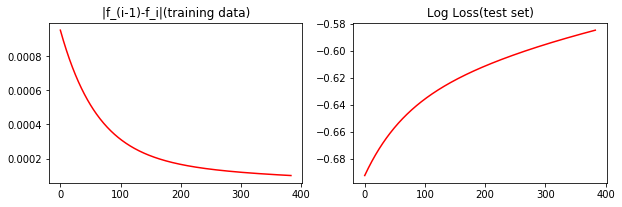

In [14]:
f = plt.figure(figsize=(10,10))
plt.subplot(321)
plt.plot(loss_diff1, 'r')
plt.title("|f_(i-1)-f_i|(training data)")
plt.subplot(322)
plt.plot(log_loss1, 'r')
plt.title("Log Loss(test set)")

|f_(i-1)-f_i| and Log loss shows that the model is well trained. The reason why the graph
of the Log loss goes up is that the optimization of Log loss is a maximum likelihood
problem. That is, the graph shows the training is working well because the loss is going to
0.

### 2.2 Logistic regression with Newton method

In [15]:
def min_loglikelihood(X, y, beta):
    l = 0
    for n in range(len(y)):
        l += y[n]*np.dot(X[n,:],beta) - np.log(1+np.exp(np.dot(X[n,:],beta)))
    
    return -l/len(y) 

def learn_logreg_Newton(X, y, x_test, y_test, mu, t_max, tolerance):
    beta = np.zeros(X.shape[1])
    loss = min_loglikelihood(X, y, beta)
    y_pred = 1/(1+np.exp(-np.dot(X,beta)))
    
    loss_diff = []
    log_loss = []            
    for t in range(t_max):
                
        g = np.matmul(X.T, (y-y_pred))/len(y)
        v = y_pred*(1-y_pred)       
        W = np.diag(v)
        H = np.matmul(np.matmul(X.T,W),X)/len(y)
                         
        beta += mu*np.matmul(np.linalg.inv(H),g)               
        
        y_pred = 1/(1+np.exp(-np.dot(X,beta)))  
        l_old = loss
        log_loss.append(min_loglikelihood(x_test, y_test, beta))
        loss = min_loglikelihood(X, y, beta)
        
        cond = np.abs(loss-l_old)
        loss_diff.append(cond)
        
        if cond < tolerance:
            return beta, loss_diff, log_loss

In [16]:
beta2, loss_diff2, log_loss2 = learn_logreg_Newton(x_train, y_train,  x_test, y_test, 0.004, 1000, .0001)

Text(0.5, 1.0, 'Log Loss(test set)')

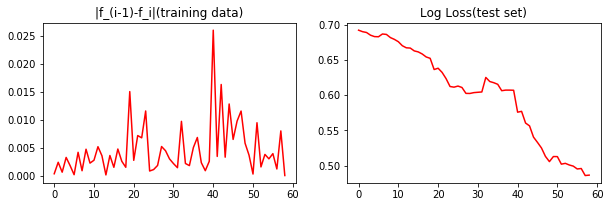

In [17]:
f = plt.figure(figsize=(10,10))
plt.subplot(321)
plt.plot(loss_diff2, 'r')
plt.title("|f_(i-1)-f_i|(training data)")
plt.subplot(322)
plt.plot(log_loss2, 'r')
plt.title("Log Loss(test set)")

|f_(i-1)-f_i| and Log loss shows the slight fluctuation depending on step length. The Log Loss is dropped because I considered minimum likelihood(i.e. -LogLoss). Therefore, we can say the newton algorithm is working well.

### 2.3 Comparison with the two algorithms
According to the results, the Newton method(loss:0.4866, iterations:59) converges to a loss value much faster than the steplength bolddriver(loss: -0.5846, iterations:384).